In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2 

In [2]:
import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USER']
dj.config['database.password'] = os.environ['DJ_PASS']
dj.config['enable_python_native_blobs'] = True

name = "simdata"
dj.config['schema_name'] = f"konstantin_nnsysident_{name}"

In [3]:
import torch
import numpy as np
import pickle 
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import re
import seaborn as sns

import nnfabrik
from nnfabrik.main import *
from nnfabrik import builder
from nnfabrik.utility.hypersearch import Bayesian

from nnsysident.tables.experiments import *
from nnsysident.tables.bayesian import *
from nnsysident.datasets.mouse_loaders import static_shared_loaders
from nnsysident.datasets.mouse_loaders import static_loaders
from nnsysident.datasets.mouse_loaders import static_loader

Connecting konstantin@sinzlab.chlkmukhxp6i.eu-central-1.rds.amazonaws.com:3306
Schema name: konstantin_nnsysident_simdata


In [11]:
# experiment_name = 'SIM, Direct, se2d_spatialxfeaturelinear, 0-0-3'
# data = pd.DataFrame((TrainedModel * Dataset * Model * Trainer * Seed * Experiments.Restrictions & 'experiment_name="{}"'.format(experiment_name)).fetch())

# for arg in ['gamma_input', 'gamma_readout']:
#     data[arg] = [row.model_config[arg] for loc, row in data.iterrows()]
# for arg in ['neuron_n', 'image_n']:
#     data[arg] = [row.dataset_config[arg] for loc, row in data.iterrows()]

In [40]:
df = pd.DataFrame()
for experiment_name in ['SIM, Direct, se2d_spatialxfeaturelinear, 0-0-3', 'SIM, Direct, se2d_pointpooled, 0-0-3', 'SIM, Direct, se2d_fullgaussian2d, 0-0-3']:
    data = pd.DataFrame((TrainedModel * Dataset * Model * Trainer * Seed * Experiments.Restrictions & 'experiment_name="{}"'.format(experiment_name)).fetch())

    for arg in ['gamma_input', 'gamma_readout']:
        data[arg] = [row.model_config[arg] for loc, row in data.iterrows()]
    for arg in ['neuron_n', 'image_n']:
        data[arg] = [row.dataset_config[arg] for loc, row in data.iterrows()]
    data['readout'] = [row.model_fn.split('.')[-1] for loc, row in data.iterrows()]
        
    df = pd.concat([df, data])

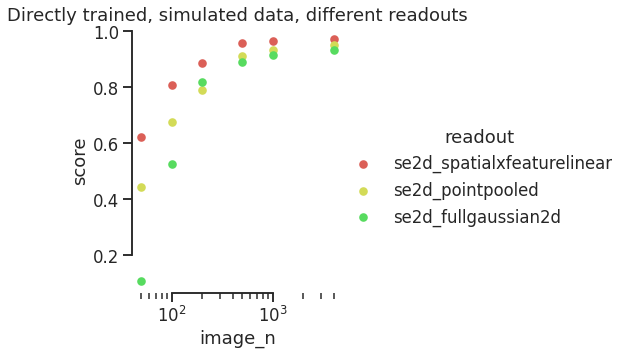

In [58]:
title = 'Directly trained, simulated data, different readouts'
legend_parameter = 'neuron_n'
x_parameter = 'image_n'

if legend_parameter == '# core images':
    hues = [80, 320, 640, 2560, 10240, 17596]
elif legend_parameter == 'neuron_n':
    hues = [1000] 
else:
    raise ValueError('legend_parameter not understood')

sns.set_context('talk')
with sns.axes_style('ticks'):
    g = sns.lmplot(x_parameter, "score", hue='readout', data=df.loc[np.isin(df[legend_parameter], hues )], 
                   x_estimator=np.mean, fit_reg=False, legend=True, palette=sns.color_palette("hls", 6), logx=True)

    g.set(xscale='log')
    g.set(title=title)
    sns.despine(trim=True)
    #g.axes[0][0].set_ylabel('val correlation') #fraction oracle correlation
    #g.axes[0][0].set_xlabel(x_parameter.replace("core ", "") + ' (core)')
    #g.axes[0][0].set_xscale('log')
    
#g.savefig(summary_title + '.pdf', dpi=150)
#g.savefig(summary_title + '.png', dpi=150)

In [56]:
df.loc[np.isin(df[legend_parameter], hues )][['model_fn', 'neuron_n', 'image_n', 'score', 'model_config']].sort_values(['model_fn', 'image_n'])

,model_fn,neuron_n,image_n,score,model_config
1,nnsysident.models.models.se2d_fullgaussian2d,100,50,0.210201,"{'gamma_input': 99.63382389871512, 'gamma_read..."
4,nnsysident.models.models.se2d_fullgaussian2d,100,100,0.517427,"{'gamma_input': 279.89177260765047, 'gamma_rea..."
6,nnsysident.models.models.se2d_fullgaussian2d,100,200,0.729571,"{'gamma_input': 80.49257484855666, 'gamma_read..."
11,nnsysident.models.models.se2d_fullgaussian2d,100,500,0.880361,"{'gamma_input': 3.8734501900917526, 'gamma_rea..."
3,nnsysident.models.models.se2d_fullgaussian2d,100,1000,0.906317,"{'gamma_input': 68.07995769672871, 'gamma_read..."
5,nnsysident.models.models.se2d_fullgaussian2d,100,4000,0.931879,"{'gamma_input': 5.329512923081591, 'gamma_read..."
1,nnsysident.models.models.se2d_pointpooled,100,50,0.420799,"{'gamma_input': 1.5518430540982504, 'gamma_rea..."
4,nnsysident.models.models.se2d_pointpooled,100,100,0.657877,"{'gamma_input': 7.289381238883359, 'gamma_read..."
6,nnsysident.models.models.se2d_pointpooled,100,200,0.779019,"{'gamma_input': 346.55952501995245, 'gamma_rea..."
11,nnsysident.models.models.se2d_pointpooled,100,500,0.883754,"{'gamma_input': 0.1, 'gamma_readout': 10.0}"


In [61]:
[1,2,3][2:]

[3]

In [62]:
TrainedModel()

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
nnsysident.models.models.se2d_fullgaussian2d,1ad851e940460d0d962b2d323f7d3b6c,nnsysident.datasets.mouse_loaders.static_loaders,53c03d1dcf82d468513dfd5f2e20e85c,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=100, image_n=100.neuron_n=100, image_n=100",0.517427,=BLOB=,kklurz,2020-05-04 13:40:20
nnsysident.models.models.se2d_fullgaussian2d,267e8b7789e90793ccbcd0b3d24345eb,nnsysident.datasets.mouse_loaders.static_loaders,426ec4fe89dab950d1db872ee357b782,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=100, image_n=1000.neuron_n=100, image_n=1000",0.906317,=BLOB=,kklurz,2020-05-04 13:38:59
nnsysident.models.models.se2d_fullgaussian2d,27e5fe30cb14aef259c7993cc1263887,nnsysident.datasets.mouse_loaders.static_loaders,d09110c6d4e65cdd4a4c38e8fd820d7b,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=1000, image_n=100.neuron_n=1000, image_n=100",0.526474,=BLOB=,kklurz,2020-05-04 13:46:09
nnsysident.models.models.se2d_fullgaussian2d,27f614be719ea0b007fc9fed89948ba7,nnsysident.datasets.mouse_loaders.static_loaders,f01c341e2bff18d80e6830a20197b5ab,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=100, image_n=500.neuron_n=100, image_n=500",0.880361,=BLOB=,kklurz,2020-05-04 13:39:26
nnsysident.models.models.se2d_fullgaussian2d,75f7be479604ab11c0d74fdbe953ec3c,nnsysident.datasets.mouse_loaders.static_loaders,919bacc5638908f51bda3ca9b4b08290,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=100, image_n=200.neuron_n=100, image_n=200",0.729571,=BLOB=,kklurz,2020-05-04 13:43:48
nnsysident.models.models.se2d_fullgaussian2d,7724862acb0c59c594146bee7494422f,nnsysident.datasets.mouse_loaders.static_loaders,1e1795eb4ae0fe5e967d5ecc80dbbb64,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=1000, image_n=4000.neuron_n=1000, image_n=4000",0.934417,=BLOB=,kklurz,2020-05-04 13:43:27
nnsysident.models.models.se2d_fullgaussian2d,82329c420b23a7525891d9456b283a36,nnsysident.datasets.mouse_loaders.static_loaders,75e619459d85440a31564de6896e4d7c,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=100, image_n=4000.neuron_n=100, image_n=4000",0.931879,=BLOB=,kklurz,2020-05-04 13:45:46
nnsysident.models.models.se2d_fullgaussian2d,9c306e7561ab71d0885138c30a14ff93,nnsysident.datasets.mouse_loaders.static_loaders,b4442e04fc2a43fb0b647a3cfdd3a48e,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullgaussian2d, neuron_n=1000, image_n=1000.neuron_n=1000, image_n=1000",0.916061,=BLOB=,kklurz,2020-05-04 13:47:20
nnsysident.models.models.se2d_fullgaussian2d,9ce2cfc31d0f6406f4643fbd63450121,nnsysident.datasets.mouse_loaders.static_loaders,3c2003ac30aa7d83553d35ad418619f7,nnsysident.training.trainers.standard_trainer,d41d8cd98f00b204e9800998ecf8427e,1,"Bayesian optimization of Hyper params..se2d_fullg

In [ ]:
data = df.loc[(df['neuron_n'] == 1000) ]

In [ ]:
df = pd.DataFrame(DatasetBayesian().fetch())
for arg in ['neuron_n', 'image_n']:
    df[arg] = [row.dataset_config[arg] for loc, row in df.iterrows()]

In [ ]:
plt.plot(data['image_n'], data['gamma_readout'], 'o')

In [ ]:
plt.plot(data['image_n'], data['gamma_input'], 'o')

In [ ]:
df = pd.DataFrame((TrainedModelBayesian * DatasetBayesian * ModelBayesian * Trainer * SeedBayesian).fetch())

In [ ]:
for arg in ['neuron_n', 'image_n']:
    df[arg] = [row.dataset_config[arg] for loc, row in df.iterrows()]
for arg in ['gamma_input', 'gamma_readout']:
    df[arg] = [row.model_config[arg] for loc, row in df.iterrows()]

In [ ]:
data = df.loc[(df['neuron_n'] == 100)&(df['image_n'] == 50)]

In [ ]:
plt.plot(data['gamma_readout'], data['score'], 'o')

In [ ]:
plt.plot(data['gamma_input'], data['score'], 'o')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['gamma_readout'], data['gamma_input'], data['score'], marker='o')
ax.set_xlabel('gamma_readout')
ax.set_ylabel('gamma_input')
ax.set_zlabel('score')

# Add the Dataset

In [ ]:
paths = ['data/static0-0-3-preproc0.zip']

dataset_fn = 'nnsysident.datasets.mouse_loaders.static_loaders'
dataset_config = dict(
    paths=paths,
    batch_size=64,
    neuron_n=1000,
    neuron_base_seed=1,
    image_n=4000,
    image_base_seed=1

)

dataset_config_auto = dict()

# Add the Model

In [ ]:
model_fn = 'nnsysident.models.models.se2d_fullgaussian2d'
model_config = {
}

model_config_auto = dict(
    gamma_input={"type": "range", "bounds": [1e-2, 1e3], "log_scale": True},
    gamma_readout={"type": "range", "bounds": [1e-6, 1e-1], "log_scale": True},
)

# Add the Trainer

In [ ]:
trainer_fn = 'nnsysident.training.trainers.standard_trainer'
trainer_config = dict()
trainer_config_auto = dict(
              )

# Run Bayesian Search

In [ ]:
# Starting the bayesian Search:
# The number of total trials can be varied, but 200 trials is usually sufficient

In [ ]:
autobayes = Bayesian(dataset_fn, dataset_config, dataset_config_auto,
              model_fn, model_config, model_config_auto,
              trainer_fn, trainer_config, trainer_config_auto, architect="kklurz", trained_model_table='nnsysident.tables.bayesian.TrainedModelBayesian', total_trials=1)
 
best_parameters, _, _, _ = autobayes.run()